In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import timeSPI as tspi

In [2]:
# get the timings from the runs over multiple datasets
timings = tspi.make_timings()

In [3]:
# extract the number of signals for each of the datasets (a little less than in tab. 4 of the paper, as we excluded some signals. See section 4.2 for details)
root_path = os.path.join("measurements", "all_spis")
datasets = ['spi_keti', 'spi_plant1', 'spi_plant2', 'spi_plant3', 'spi_plant4', 'spi_rotary', 'spi_soda']
dataset_signals = dict()
for dataset in datasets:
    available_files = glob(os.path.join(root_path, dataset, '*.parquet'))
    assert len(available_files) == 1, 'There is none/more than one dataset in the path.'
    dataset_frame = pd.read_parquet(available_files[0])
    dataset_signals[dataset.split('_', 1)[1]] = dataset_frame.shape[1]

In [4]:
# as the timings are measured for the entire similarity matrix and the datasets have different sizes, we need to compute the time per signal
# for each dataset by dividing by the number of signals squared (size of the similarity matrix)
for dataset_name, number in dataset_signals.items():
    timings[dataset_name] = timings[dataset_name]/(number*number)

In [5]:
# now we can compute the mean execution time per relationship measure
mean_timings = pd.DataFrame(timings.mean(axis=1), columns=['Execution time [s]'])

Text(0.5, 0, 'Relationship measures')

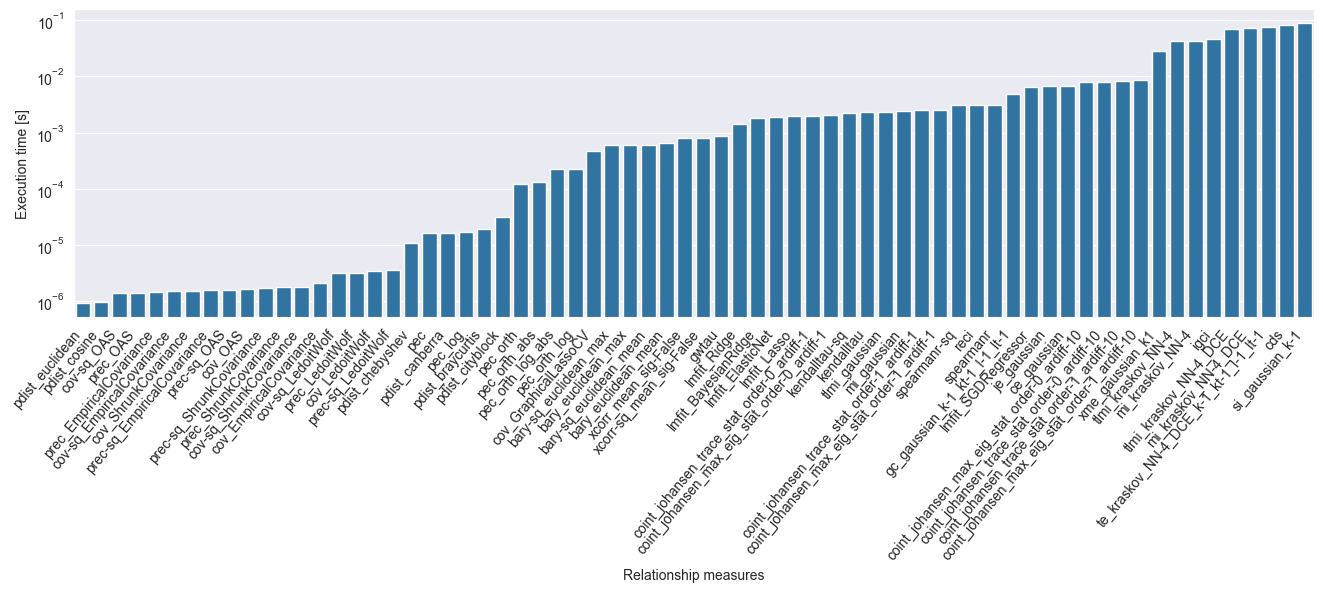

In [6]:
# make a plot indicating the times
plt.figure(figsize=(16, 4))
sorted_mean_timings = mean_timings.sort_values(by='Execution time [s]')
plot = sns.barplot(sorted_mean_timings, x=sorted_mean_timings.index, y='Execution time [s]')
plt.yscale('log')
plt.xticks(rotation=50, ha='right')
plot.set_xlabel('Relationship measures')

In [7]:
# now sort by their groups
multinindex_mean_timings = mean_timings.copy()
multinindex_mean_timings.index = pd.MultiIndex.from_tuples([(idx.split('_', 1)[0], idx) for idx in mean_timings.index])
multinindex_mean_timings = multinindex_mean_timings.sort_index()

In [8]:
# group the relationship measures to reduce the count and plot the timings
grouped_mean_timings = multinindex_mean_timings.groupby(level=[0]).mean()
grouped_mean_timings = grouped_mean_timings.sort_values('Execution time [s]', ascending=True)

Text(0.5, 0, 'Relationship measures')

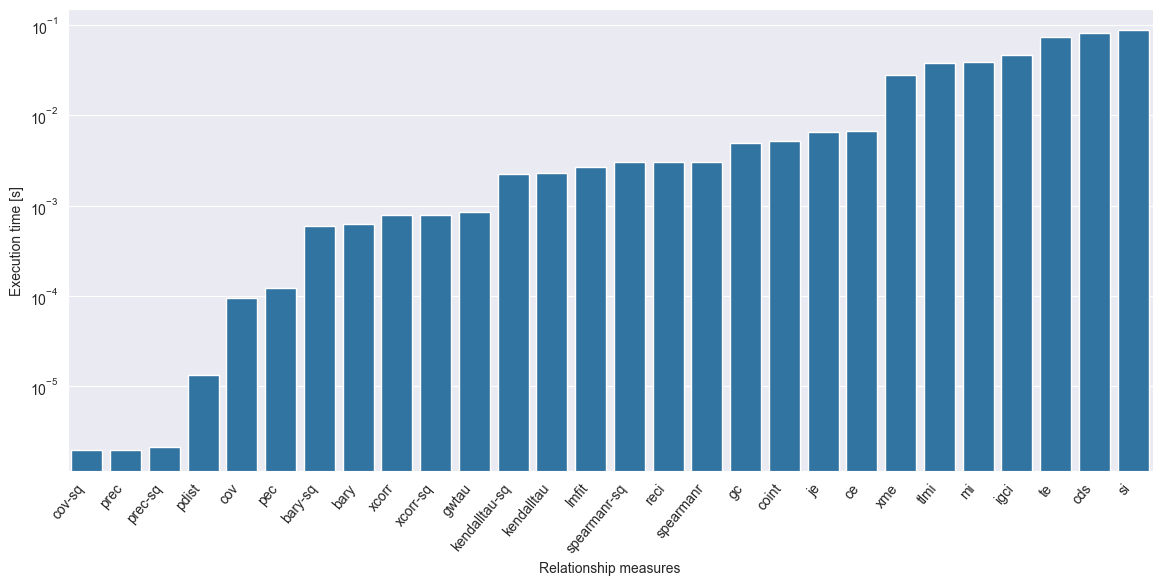

In [9]:
# make a plot indicating the times
plt.figure(figsize=(14, 6))
plot = sns.barplot(grouped_mean_timings, x=grouped_mean_timings.index, y='Execution time [s]')
plt.yscale('log')
plt.xticks(rotation=50, ha='right')
plot.set_xlabel('Relationship measures')